# A1.5 Solucion de Problemas



Andrés Luna de la Garza #608994
<br><br>



<br><br>
1. Importa los datos del archivo “Calificaciones.csv” a tu ambiente de trabajo. Este archivo lo encontrarás en la misma página donde descargaste esta plantilla. Imprime en consola el tipo de dato de cada variable del data frame.  <br><br>

In [118]:
import pandas as pd
data= pd.read_csv("A1.5 Calificaciones.csv")
print(data.dtypes)

#En este paso primero se importó la librería pandas, luego se realizó la lectura del archivo y el almacenamiento la información en la variable data.
#Después con la función de print(data.dtypes), se imprime el tipo de datos con que se cuenta

Escuela           object
Sexo              object
Edad               int64
HorasDeEstudio     int64
Reprobadas         int64
Internet          object
Faltas             int64
G1                 int64
G2                 int64
G3                 int64
dtype: object


<br><br>
2. Transforma todas las variables categóricas, de forma que los nuevos datos sean útiles para generar un modelo de regresión lineal múltiple. Presta especial atención a variables que, aunque parecen cuantitativas (contienen números), realmente son cualitativas (los números representan una clase). Imprime las primeras 5 observaciones de la base de datos modificada, demostrando que las variables cualitativas desaparecieron y fueron reemplazadas por variables adecuadas

In [119]:
dummyEscuela= pd.get_dummies(data.Escuela, drop_first=True)
data= pd.concat([data,dummyEscuela],axis=1)
data= data.drop("Escuela", axis=1)
dummySexo= pd.get_dummies(data.Sexo, drop_first=True)
data= pd.concat([data,dummySexo],axis=1)
data= data.drop("Sexo", axis=1)
dummyInternet= pd.get_dummies(data.Internet,drop_first=True)
data= pd.concat([data,dummyInternet],axis=1)
data= data.drop("Internet", axis=1)
print(data.head())
#En esta sección se crean variables dummy para aquellas variables que se identifican de tipo object
#También, se concatenaron las variables dummy al dataframe y se eliminaron las variables "originales"
#Después se imprimieron las primeras 5 observaciones de la base de datos modificada

   Edad  HorasDeEstudio  Reprobadas  Faltas  G1  G2  G3     MS      M    yes
0    18               2           0       6   5   6   6  False  False  False
1    17               2           0       4   5   5   6  False  False   True
2    15               2           3      10   7   8  10  False  False   True
3    15               3           0       2  15  14  15  False  False   True
4    16               2           0       4   6  10  10  False  False  False


<br><br>3. Identifica valores atípicos para la variable “Faltas”, utilizando el método de Tukey con k=3. Imprime en consola todas las observaciones que se consideren atípicas, y tras revisar las características de dichas observaciones, agrega una línea de texto que describa qué planeas hacer con dichos valores y por qué. Realiza la acción descrita en caso de ser necesario.

<br><br>

In [120]:
import numpy as np
# Cuartil uno
q1= data.Faltas.quantile(0.25)
# Cuartil tres
q3= data.Faltas.quantile(0.75)
# Rango intercuartil
iqr= q3-q1
# Límite inferior
li= q1-(3*iqr)
# Límite superior
ls= q3+(3*iqr)
# Observaciones fuera de cualquiera de los dos límites
out= np.where((data.Faltas<=li) | (data.Faltas>=ls))[0]
# Imprimir información de outliers
print("Valores atípicos:")
print(data.iloc[out,:])
print("Debido a que los valores atípicos de la columna Faltas estan muy alejados del promedio, se decide eliminarlas")
data= data.drop(index=out).reset_index(drop=True)
#Aquí se importa la librería numpy y se realiza el proceso del método de Tukey considerando una k=3
#Tal como s emenciona en la línea de texto, se eliminan los valores de la columna Faltas

Valores atípicos:
     Edad  HorasDeEstudio  Reprobadas  Faltas  G1  G2  G3     MS      M   yes
74     16               2           0      54  11  12  11  False  False  True
183    17               2           0      56   9   9   8  False  False  True
276    18               2           0      75  10   9   9  False  False  True
307    19               1           1      38   8   9   8  False   True  True
315    19               3           1      40  13  11  11  False  False  True
Debido a que los valores atípicos de la columna Faltas estan muy alejados del promedio, se decide eliminarlas


<br><br>4. Genera una matriz de correlaciones para encontrar potenciales problemas de colinealidad. Genera un heatmap para visualizar de forma más sencilla los resultados.
Determina si es necesario eliminar una o múltiples variables, explicando tu razonamiento en una línea de texto. Realiza la acción descrita en caso de ser necesario.
<br><br>

Indices con mayor correlación:  G2 , G3
Valor con correlación máxima:  0.9047966735871248
Tomando en cuenta que G2 y G3 cuentan con una correlación alta, se considera necesario eliminar G2 ya que para el contexto escolar, no sería conveniente eliminar la calificación final (G3)


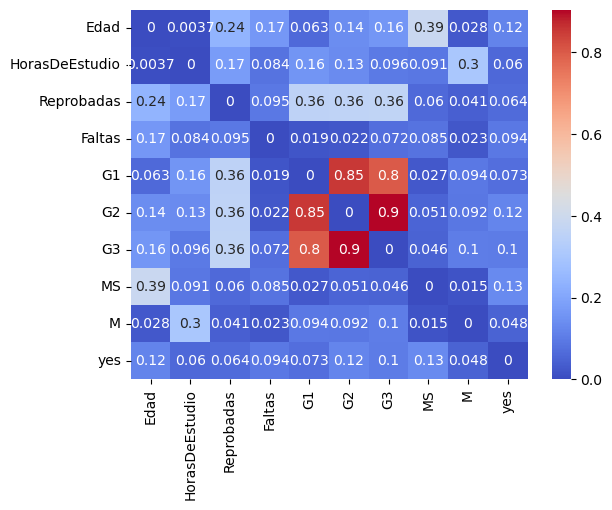

In [121]:
cor= data.corr().abs()
np.fill_diagonal(cor.values,0)
i,j=  np.unravel_index(cor.values.argmax(),cor.shape)
print("Indices con mayor correlación: ", cor.index[i], ",", cor.columns[j])
print("Valor con correlación máxima: ", cor.iloc[i,j])
import seaborn as sns
sns.heatmap(cor, annot=True, cmap="coolwarm")
print("Tomando en cuenta que G2 y G3 cuentan con una correlación alta, se considera necesario eliminar G2 ya que para el contexto escolar, no sería conveniente eliminar la calificación final (G3)")

data= data.drop("G2", axis=1)
#Para esta celda, se realiza la correlación al llenar la diagonal con ceros y obtener los índices [i,j] de la posición del valor máxmio
#Posteriormente se imprimen los índices y el valor de correlación máxima y se grafica el heatmap
#Considerando la correlación, se elimina G2

<br><br>5. Incluye términos de interacción para al menos dos pares de variables, las que te llame más la atención analizar con esta metodología. Trata de evitar incluir interacciones para todos los pares de variables posibles. Imprime en consola las primeras 5 observaciones de la base de datos con los nuevos términos
<br><br>

In [11]:
data["EdadXFaltas"]= data["Edad"]*data["Faltas"]
data["InternetXG1"]= data["yes"]*data["G1"]
print(data.head())
#Debido a que se evita incluir interacciones para TODOS los pares de variables posibles, se obtienen de manera manual respetando el tipo de variable (enfoque numérico)
#Dicho esto, se relacionan las horas de estudio con las faltas y el internet con la primera calificaicón
#Se muestran las primeras 5 observaciones de la base de datos con los nuevos términos verificando que coincida

   Edad  HorasDeEstudio  Reprobadas  Faltas  G1  G3     MS      M    yes  \
0    18               2           0       6   5   6  False  False  False   
1    17               2           0       4   5   6  False  False   True   
2    15               2           3      10   7  10  False  False   True   
3    15               3           0       2  15  15  False  False   True   
4    16               2           0       4   6  10  False  False  False   

   EdadXFaltas  InternetXG1  
0          108            0  
1           68            5  
2          150            7  
3           30           15  
4           64            0  


<br><br>6. Entrena un modelo de regresión lineal múltiple en un subconjunto de datos que corresponda al 80% de los datos totales e imprime en consola un resumen de los resultados obtenidos. Posteriormente, usando dicho modelo, predice la calificación final del 20% de las observaciones que no se usaron para entrenar. Genera una gráfica de dispersión de las calificaciones finales reales contra las calificaciones finales estimadas
por el modelo en los datos de prueba. Agrega una línea de texto donde des una conclusión sobre los resultados del modelo, con base en la información que se muestra en la gráfica.
<br><br>

A continuación se encuentra la gráfica:
 
En base a los resultados obtenidos, se identifica lo siguiente:
La gráfica demuestra que el modelo de regresión múltiple logra predecir en su mayoría las calificaciones finales (G3) de manera adecuada.
La mayoría de los puntos azules se encuentran cercanos a la línea roja, lo que indica que las calificaciones estimadas son muy similares a las reales.
No obstante, se observan algunas desviaciones en valores específicos, aunque en general el modelo cumple satisfactoriamente con la predicción.


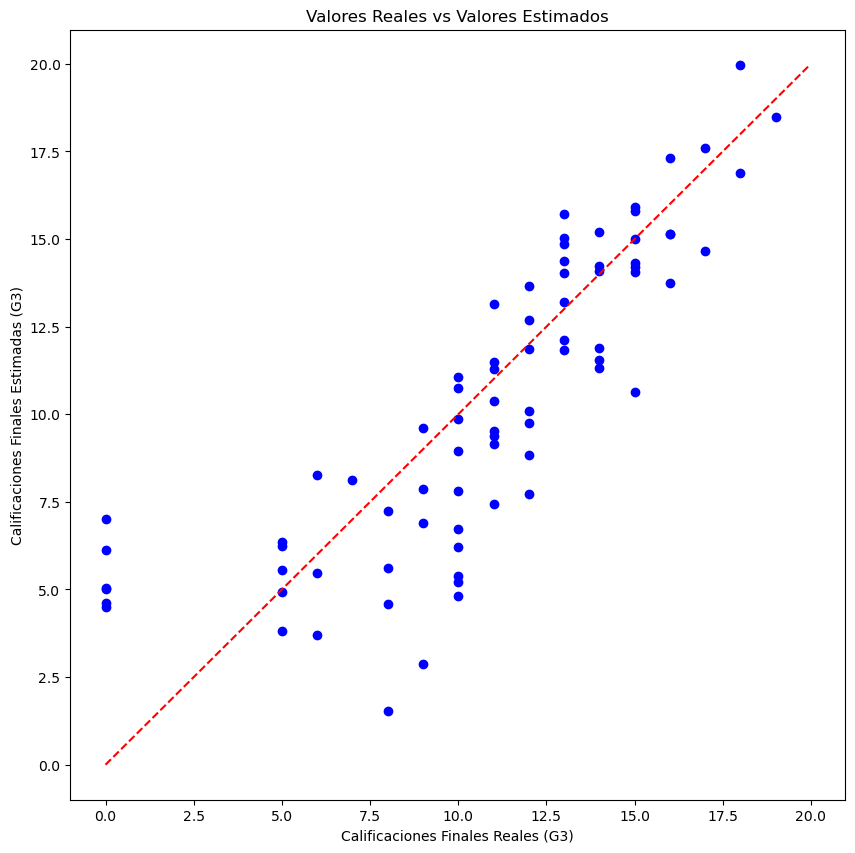

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X= data.drop("G3", axis=1) 
y= data["G3"]  

XTrain, XTest, YTrain, YTest = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo de regresión lineal múltiple (evitando pandas por variables)
model= LinearRegression()
model.fit(XTrain, YTrain)
YPred= model.predict(XTest)

plt.figure(figsize=(10, 10)) # "Zoom" de gráfica para apreciar mejor los datos
print("A continuación se encuentra la gráfica:")
plt.scatter(YTest, YPred, color='blue')
minv= min(YTest.min(), YPred.min())
maxv= max(YTest.max(), YPred.max())
plt.plot([minv, maxv], [minv, maxv], 'r--')  
plt.xlabel('Calificaciones Finales Reales (G3)')
plt.ylabel('Calificaciones Finales Estimadas (G3)')
plt.title('Valores Reales vs Valores Estimados')
print(" ")
print("En base a los resultados obtenidos, se identifica lo siguiente:")
print("La gráfica demuestra que el modelo de regresión múltiple logra predecir en su mayoría las calificaciones finales (G3) de manera adecuada.")
print("La mayoría de los puntos azules se encuentran cercanos a la línea roja, lo que indica que las calificaciones estimadas son muy similares a las reales.")
print("No obstante, se observan algunas desviaciones en valores específicos, aunque en general el modelo cumple satisfactoriamente con la predicción.")

#Por último, se importa la libreria sklearn.model_selection y sklearn.linear_model para el apartado de train y test y el modelo linear. También la librería de matplotlib.pyplot para graficar los resultados esperados
#Después se divide el conjunto de entrenamiento respetando lo indicado en las instrucciones y se entrena el modelo de regresión lineal múltiple
#Luego se hacen predicciones en el conjunto de prueba
#Para generar la línea recta, se obtienen los mínimos y máximos de los valores de validación y se grafica junto con los de la calificación final (G3)

<br>Código de Honor: Yo, Andrés Luna de la Garza, doy mi palabra que he realizado esta actividad con integridad académica